In [65]:
#Question 1
#Importing the dataset and converting it to numpy array
import pandas as pd
import numpy as np
df = pd.read_csv('digits.csv')
data = df.to_numpy()

<ipython-input-66-370b79268be9>:12: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  img1 = rgb2gray(img_as_float(img_lst[a]))


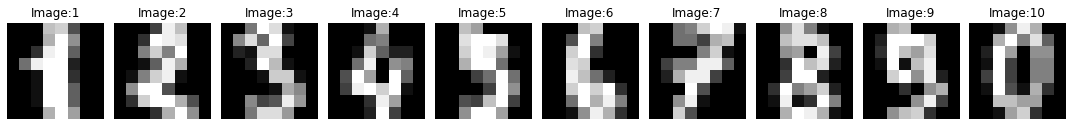

In [66]:
#Question 2
#Reshaped the first 10 rows(images) in the dataset to an 8*8 matrix
from matplotlib import pyplot as plt
from skimage.color import rgb2gray
from skimage import img_as_ubyte,img_as_float
#List to store the 8*8 matrix
img_lst=[]
for i in range(10):
    img_lst.append(data[i,:64].reshape(8,8))
fig,axes = plt.subplots(1,10,figsize=(15,15))
for a in range(10):
    img1 = rgb2gray(img_as_float(img_lst[a]))  
    axes[a].imshow(img1,cmap='gray')
    axes[a].set_title(f"Image:{a+1}")
    axes[a].axis('off')
fig.tight_layout()    
plt.show()

In [72]:
#Question 3 
#Applying PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
#scaled_Data=StandardScaler().fit_transform(data[:,:64])
pca = PCA()
proj = pca.fit_transform(data[:,:64])
eigenvalues = pca.explained_variance_
eigenvector = pca.components_
variance_captured = pca.explained_variance_ratio_

<ipython-input-68-a2fced88a566>:8: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  img1 = rgb2gray(img_as_float(eigen_vector[a]))


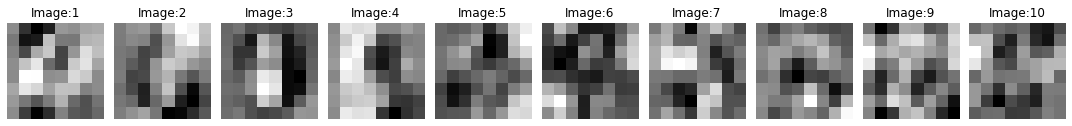

In [68]:
#The list eigen_vector[] will have first 10 eigen vectors reshaped to (8,8) matrix
eigen_vector = []
for i in range(10):
    eigen_vector.append(eigenvector[i,:].reshape(8,8))
#Plotting the Eigen Vector
fig,axes = plt.subplots(1,10,figsize=(15,15))
for a in range(10):
    img1 = rgb2gray(img_as_float(eigen_vector[a]))  
    axes[a].imshow(img1,cmap='gray')
    axes[a].set_title(f"Image:{a+1}")
    axes[a].axis('off')
fig.tight_layout()    
plt.show()

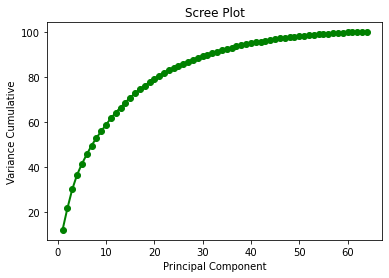

In [69]:
#Question 4 Scree Plot
#Calculated the Cumulative Variance and plotted against Principal Component
variance_captured = pca.explained_variance_ratio_
var_cumulative = np.cumsum(variance_captured)*100
PC_Component = np.arange(pca.n_components_) + 1
plt.plot(PC_Component,var_cumulative, 'go-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Cumulative')
plt.show()
# From the scree plot it is evident that, almost 85% of data is represented by 25 components

In [60]:
#Question 5 
#Reduce Image Dimension to the  optimal number  of  principle  components
#Based on the above scree plot(Question 4), almost 25 components can give 80-85% of data. So using 25 as 
#optimal number of components to compress the data
from numpy.linalg import svd
#optimal components
k = 25
U,s,V = svd(data[:,:64],full_matrices=False)
compressed_image = np.dot(U[:,:k],np.dot(np.diag(s[:k]),V[:k,:]))

<ipython-input-70-e9241362956c>:6: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  img1 = rgb2gray(img_as_float(img_lst[a]))


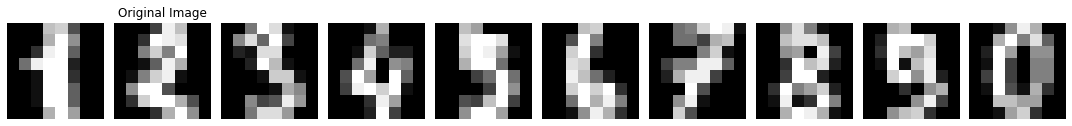

<ipython-input-70-e9241362956c>:17: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  img1 = rgb2gray(img_as_float(c_image[a]))


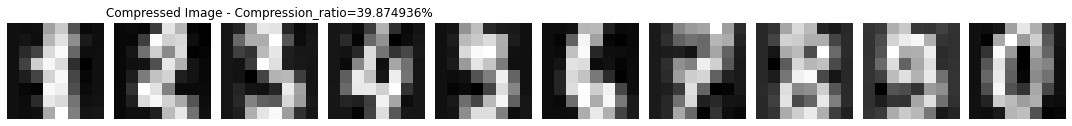

In [70]:
#Plotting the compressed_image
original_shape = data.shape
compression_ratio = 100.0*(k*(original_shape[0]+original_shape[1])+k)/(original_shape[0]*original_shape[1])
fig,axes = plt.subplots(1,10,figsize=(15,15))
for a in range(10):
    img1 = rgb2gray(img_as_float(img_lst[a]))  
    axes[a].imshow(img1,cmap='gray')
    axes[a].axis('off')
axes[1].set_title("Original Image")
fig.tight_layout()    
plt.show() 
fig,axes = plt.subplots(1,10,figsize=(15,15))
c_image=[]
for i in range(10):
    c_image.append(compressed_image[i,:].reshape(8,8))
for a in range(10):
    img1 = rgb2gray(img_as_float(c_image[a]))  
    axes[a].imshow(img1,cmap='gray')
    axes[a].axis('off')
axes[2].set_title("Compressed Image - Compression_ratio={:2f}".format(compression_ratio)+"%")
fig.tight_layout()   

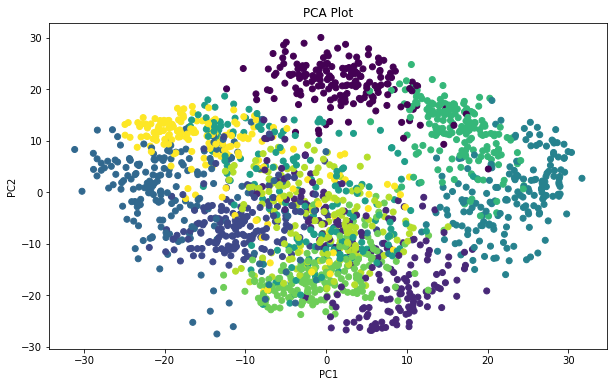

In [73]:
# QUestion 6 - Visualize the reduced dataset by plotting PC1 against PC2 using a scatterplot.
fig, ax = plt.subplots(figsize=(10, 6))
ax.set(title = "PCA Plot",
       xlabel = "PC1", 
       ylabel = "PC2")
ax.scatter(proj[:,0], proj[:,1],c=data[:,64])

In [ ]:
# Question 7 - Curse of Dimensionality and Importance of Dimensionality Reduction in Machine Learning
As the dimension of data increases, the difficulty in analyzing and processing the data increases. It requires more storage
and algorithm designed in such data may have higher running time. Also, there is a possibility of noise and redundant features
in a high-dimensional data. Thus, the error rate might increase with the increase in dimensions.
PCA(Principal Componenet Analysis) is a method, that helps to overcome this issue. PCA can extract/derive the important
information equivalent to the original data in lesser dimension.